# Weekly COVID-19 Hospitalization & Mortality Dashboard Update
Center for Human Dynamics in the Mobile Age (HDMA) at San Diego State University

Jessica Embury

### Modules

In [119]:
import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.features import FeatureLayerCollection
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import json
import sys
import webbrowser
from copy import deepcopy

### User Entered Variables

In [110]:
###############
###SET DATES###
###############
old_date = '11/28/2020'
new_date = '12/12/2020'

##########################
###SET PATHS IN AND OUT###
##########################
#PATHS IN
#Cumulative Dates Files
hosp_dates = './data/covid19_hospitalization.csv'
mort_dates = './data/covid_mortality.csv'

#PATHS OUT
hosp_out = './data/covid19_hospitalization_change_upload.csv'
mort_out = './data/covid19_mortality_change_upload.csv' 

hosp_cum_out = './data/covid19_hospitalization_change.csv'
mort_cum_out = './data/covid19_mortality_change.csv'

hosp_append_out = './data/covid19_hospitalization_append.csv'
mort_append_out = './data/covid19_mortality_append.csv'

hosp_db = 'C:/Users/jesse/Dropbox/Mapping-Vulearable-Pop-Tasks/SD-County-Data/COVID-Data-Share-at-HDMA-Center/Hosp-ICU-Mortalities/weekly_covid19_hospitalization_{}.csv'.format(new_date.replace('/',''))
mort_db = 'C:/Users/jesse/Dropbox/Mapping-Vulearable-Pop-Tasks/SD-County-Data/COVID-Data-Share-at-HDMA-Center/Hosp-ICU-Mortalities/weekly_covid19_mortalities_{}.csv'.format(new_date.replace('/',''))


######################################
###ARCGIS ACCOUNT LOGIN INFORMATION###
######################################
#reference for authentication schemes: https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/
pro = "pro"
#portal =''
#username=''
#password=''

################################
###ARCGIS DETAILS FOR UPDATES###
################################
hosp_layer_id = '7391a05451dd46c2bca824b5462f2bb3'
hosp_cum_layer_id = '60ff04b16e604005a2dc22eec9021892'
hosp_map_id = '4903c250ec914dac8b35c680ddb6dd80'
hosp_cum_csv_id = 'd2af94b59d5844e7841fbfa62f244759'
hosp_append_csv_id = '370cd585e3504a52b64b685496368ea3'

mort_layer_id = 'd9d780a386c94125b5a114170ccc6a93'
mort_cum_layer_id = '49479d1460824824bda5ba2b3c0d0af2'
mort_map_id = '27b40ea7731b4871a3ce8142d1367c42'
mort_cum_csv_id = '126b5a2407324cf98cc044d71d03deaf'
mort_append_csv_id = 'b67c5962bce943bfb9d208b403d51443'

dash = 'https://experience.arcgis.com/experience/1b37559545cc47beb83f7df3a808e399/'
dash_edit = 'https://sdsugeo.maps.arcgis.com/apps/opsdashboard/index.html#/203c186d66504b03bad8d408c345b846?mode=edit'
dash_mobile_edit = 'https://sdsugeo.maps.arcgis.com/apps/opsdashboard/index.html#/5727cdca71d146c3a068bc29a8c2e244?mode=edit'

### Connect to ArcGIS Account

In [111]:
gis = GIS(pro)
#gis = GIS(portal, username, password)

### Functions for Map Modifications

In [112]:
def get_map (map_id):
    '''
    GET MAP DATA FOR SYMBOLOGY CHANGES
    '''    
    m = gis.content.get(map_id)
    data = m.get_data()
    print(m)    
    return data

def update_map (map_id, data):
    '''
    UPDATE MAP TO SAVE CHANGES
    '''
    m = gis.content.get(map_id)  
    # Set the item_properties to include the desired update
    properties = {"text": json.dumps(data)}
    # 'Commit' the updates to the Item
    update = m.update(item_properties=properties)    
    return update

# HOSPITALIZATION

### Format Data

In [113]:
#read csv with all accumulated case numbers
hosp = pd.read_csv(hosp_dates)
hosp.head()

,sra_num,sra_name,latitude,longitude,6/3/2020,6/10/2020,6/17/2020,6/24/2020,7/1/2020,7/8/2020,7/14/2020,7/28/2020,8/4/2020,8/11/2020,8/18/2020,8/24/2020,8/29/2020,9/5/2020,9/19/2020,9/26/2020,10/3/2020,10/10/2020,10/17/2020,10/24/2020,10/31/2020,11/7/2020,11/14/2020,11/21/2020,11/28/2020,12/12/2020
0,1,Central San Diego,32.722644,-117.141073,94.39,102.22,109.7,114.9,127.6,138.8,150.6,176.5,189.0,195.0,198.1,199.9,205.7,207.7,217.5,225.6,238.9,242.1,248.0,250.8,262.4,269.5,282.0,293.2,304.1,335.2
1,2,Peninsula,32.742274,-117.216035,7.67,7.67,9.7,9.7,10.6,10.6,12.3,14.8,14.8,16.2,16.7,17.7,17.7,18.7,18.7,18.7,18.7,18.7,18.7,18.7,19.7,21.1,22.6,23.6,24.0,26.9
2,3,Coronado,32.657317,-117.143062,0.00,0.00,0.0,5.0,5.0,5.0,5.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,11.0
3,4,National City,32.665847,-117.099737,81.06,82.99,88.8,97.5,103.3,110.0,117.7,124.6,131.3,137.1,139.0,141.9,145.8,150.6,156.4,163.2,164.1,166.1,167.0,169.0,173.8,177.7,180.6,186.4,193.1,205.7
4,5,Southeastern San Diego,32.685705,-117.038621,118.17,125.60,141.4,150.3,168.2,184.6,200.2,245.2,263.0,274.8,284.4,289.9,294.9,304.7,312.7,320.6,323.6,333.5,341.0,346.9,352.3,356.7,362.3,374.9,388.6,429.6


In [114]:
#calculate change for new week
hosp_new_week = hosp[['sra_num', 'sra_name', 'latitude', 'longitude', old_date, new_date]]
hosp_new_week['{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))] = hosp_new_week[new_date] - hosp_new_week[old_date]
hosp_new_week.head()

,sra_num,sra_name,latitude,longitude,11/28/2020,12/12/2020,11/28/20 - 12/12/20
0,1,Central San Diego,32.722644,-117.141073,304.1,335.2,31.1
1,2,Peninsula,32.742274,-117.216035,24.0,26.9,2.9
2,3,Coronado,32.657317,-117.143062,8.0,11.0,3.0
3,4,National City,32.665847,-117.099737,193.1,205.7,12.6
4,5,Southeastern San Diego,32.685705,-117.038621,388.6,429.6,41.0


In [ ]:
#add new week column to cumulative weekly change csv file
hosp_new = pd.read_csv(hosp_cum_out)
hosp_new = hosp_new.merge(hosp_new_week[['sra_num', '{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))]], on='sra_num')
hosp_new.to_csv(hosp_cum_out, index=False)
hosp_new.to_csv(hosp_db, index=False)
hosp_new.head()

In [116]:
# format and save append csv for new column
hosp_append = hosp_new_week[['sra_num', '{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))]]
hosp_append.to_csv(hosp_append_out, index=False)
hosp_append.head()

,sra_num,11/28/20 - 12/12/20
0,1,31.1
1,2,2.9
2,3,3.0
3,4,12.6
4,5,41.0


In [117]:
#format and save csv for layer overwrite
hosp_new_week = hosp_new_week.rename(columns = {'{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20')):'new_hosp_admissions'})
hosp_new_week['date_range'] = '{} - {}'.format(old_date, new_date)

del hosp_new_week[old_date]
del hosp_new_week[new_date]

hosp_new_week.to_csv(hosp_out, index=False)
hosp_new_week.head()

,sra_num,sra_name,latitude,longitude,new_hosp_admissions,date_range
0,1,Central San Diego,32.722644,-117.141073,31.1,11/28/2020 - 12/12/2020
1,2,Peninsula,32.742274,-117.216035,2.9,11/28/2020 - 12/12/2020
2,3,Coronado,32.657317,-117.143062,3.0,11/28/2020 - 12/12/2020
3,4,National City,32.665847,-117.099737,12.6,11/28/2020 - 12/12/2020
4,5,Southeastern San Diego,32.685705,-117.038621,41.0,11/28/2020 - 12/12/2020


### Overwrite Hospitalization Feature Layer and CSV File

In [121]:
#overwrite master csv with all dates data
csv_item = gis.content.get(hosp_cum_csv_id)
csv_item.update({}, hosp_cum_out)

True

In [122]:
#overwrite append csv with all dates data
csv_item = gis.content.get(hosp_append_csv_id)
csv_item.update({}, hosp_append_out)

True

In [123]:
#get feature layer containing updated data 
hosp_layer = gis.content.get(hosp_layer_id)
hosp_layer

hosp_layer_collection = FeatureLayerCollection.fromitem(hosp_layer)

#call the overwrite() method which can be accessed using the manager property
hosp_layer_collection.manager.overwrite(hosp_out)

{'success': True}

### Append new column to cumulative layer

In [124]:
#get feature layer containing updated data for maps associated with the CUMULATIVE COVID-19 dashboard
layer2 = gis.content.get(hosp_cum_layer_id)
layer2

<Item title:"COVID19 Weekly Hospital Admits" type:Feature Layer Collection owner:jembury8568_SDSUGeo>

In [125]:
#List all the current fields in the layer so you can use one as a field template.
cum_hosp_lyr = layer2.layers[0]
cum_hosp_lyr

<FeatureLayer url:"https://services1.arcgis.com/SIYkiqjmENweC50g/arcgis/rest/services/COVID19_Weekly_Hospital_Admits/FeatureServer/0">

In [126]:
#reformat date for use in appending: append_source = column name in csv, append_field = column name in feature layer, append_alias = column alias
append_alias = '{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))
append_field = 'F{}___{}'.format(old_date.replace('2020','20').replace('/','_'), new_date.replace('2020','20').replace('/','_'))
append_source = '{}___{}'.format(old_date.replace('2020','20').replace('/','_'), new_date.replace('2020','20').replace('/','_'))

print(append_alias)
print(append_field)
print(append_source)

11/28/20 - 12/12/20
F11_28_20___12_12_20
11_28_20___12_12_20


In [128]:
#Create a dictionary from a deep copy of a field in the feature layer, and update the values of this dictionary to reflect a new field.
new_field = dict(deepcopy(cum_hosp_lyr.properties.fields[5]))
new_field['name'] = append_field
new_field['alias'] = append_alias
new_field['length'] = "10"
print(new_field)

#Update feature layer definition with the new field using the add_to_definition() method.
field_list = [new_field]
cum_hosp_lyr.manager.add_to_definition({"fields":field_list})

{'name': 'F11_28_20___12_12_20', 'type': 'esriFieldTypeDouble', 'actualType': 'float', 'alias': '11/28/20 - 12/12/20', 'sqlType': 'sqlTypeFloat', 'nullable': True, 'editable': True, 'domain': None, 'defaultValue': None, 'length': '10'}


{'success': True}

In [129]:
#get *append_csv_info* when appending a new column for source_info
append_csv_info = gis.content.analyze(item=hosp_append_csv_id, file_type='csv', location_type='none')
#append_csv_info

In [130]:
#append new date column to feature layer from csv item
cum_hosp_lyr.append(item_id= hosp_append_csv_id,
                      upload_format = 'csv',
                      field_mappings = [{"name":"{}".format(append_field), "source":"{}".format(append_source)},
                                        {"name":"sra_num", "source":"sra_num"}],
                      source_info = append_csv_info['publishParameters'],
                      update_geometry=False,
                      append_fields=["{}".format(append_field), "sra_num"],
                      skip_inserts=True,
                      upsert_matching_field="sra_num")

True

### Modify Hospitalization Map Symbology

In [131]:
#get hospitalization max for graduated point symbology
hosp_max = hosp_new_week['new_hosp_admissions'].max()
print(hosp_max)

#get map data
hosp_map = get_map(hosp_map_id)

#set max value for graduated points symbols
hosp_map['operationalLayers'][1]['layerDefinition']['drawingInfo']['renderer']['visualVariables'][0]['maxDataValue'] = hosp_max.item()
hosp_map['operationalLayers'][1]['layerDefinition']['drawingInfo']['renderer']['authoringInfo']['visualVariables'][0]['maxSliderValue'] = hosp_max.item()
hosp_map['operationalLayers'][2]['layerDefinition']['drawingInfo']['renderer']['visualVariables'][0]['maxDataValue'] = hosp_max.item()
hosp_map['operationalLayers'][2]['layerDefinition']['drawingInfo']['renderer']['authoringInfo']['visualVariables'][0]['maxSliderValue'] = hosp_max.item()

#update map to save changes
hosp_map_update = update_map(hosp_map_id, hosp_map)
hosp_map_update

59.19999999999999
<Item title:"New Weekly COVID-19 Hospital Admits by SD SRA" type:Web Map owner:jembury8568_SDSUGeo>


True

# MORTALITY

### Format Data

In [132]:
#read csv with all accumulated case numbers
mort = pd.read_csv(mort_dates)
mort.head()

,sra_num,sra_name,latitude,longitude,6/3/20,6/10/2020,6/17/2020,6/24/2020,7/1/2020,7/8/2020,7/14/2020,7/28/2020,8/4/2020,8/11/2020,8/18/2020,8/24/2020,8/29/2020,9/5/2020,9/19/2020,9/26/2020,10/3/2020,10/10/2020,10/17/2020,10/24/2020,10/31/2020,11/7/2020,11/14/20,11/21/20,11/28/20,12/12/2020
0,1,Central San Diego,32.722644,-117.141073,15.584,16.985,19.1,21.8,23.5,25.6,28.8,35.8,38.5,40.5,40.9,41.3,41.3,42.3,43.6,44.2,50.3,50.7,52.4,53.8,57.2,59.5,64.1,67.1,69.3,76.7
1,2,Peninsula,32.742274,-117.216035,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,5.2,5.2,5.2,5.2,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,5.7,6.1,6.1,6.1,6.1,6.1
2,3,Coronado,32.657317,-117.143062,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4,National City,32.665847,-117.099737,21.224,23.154,24.1,25.1,26.0,32.8,34.7,38.6,41.5,41.5,43.4,43.4,43.4,46.3,48.3,48.3,50.2,51.2,52.1,52.1,53.1,53.1,54.1,55.0,56.0,59.9
4,5,Southeastern San Diego,32.685705,-117.038621,16.742,17.457,19.4,20.3,24.4,32.1,41.5,63.4,64.7,66.8,70.3,73.0,73.3,77.2,81.1,82.7,83.4,84.4,85.5,88.2,89.1,89.1,89.4,94.2,95.8,104.9


In [133]:
#calculate change for new week
mort_new_week = mort[['sra_num', 'sra_name', 'latitude', 'longitude', old_date.replace('2020','20'), new_date]]
mort_new_week['{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))] = mort_new_week[new_date] - mort_new_week[old_date.replace('2020','20')]
mort_new_week.head()

,sra_num,sra_name,latitude,longitude,11/28/20,12/12/2020,11/28/20 - 12/12/20
0,1,Central San Diego,32.722644,-117.141073,69.3,76.7,7.4
1,2,Peninsula,32.742274,-117.216035,6.1,6.1,0.0
2,3,Coronado,32.657317,-117.143062,0.0,5.0,5.0
3,4,National City,32.665847,-117.099737,56.0,59.9,3.9
4,5,Southeastern San Diego,32.685705,-117.038621,95.8,104.9,9.1


In [ ]:
#add new week column to cumulative weekly change csv file
mort_new = pd.read_csv(mort_cum_out)
mort_new = mort_new.merge(mort_new_week[['sra_num', '{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))]], on='sra_num')
mort_new.to_csv(mort_cum_out, index=False)
mort_new.to_csv(mort_db, index=False)
mort_new.head()

In [134]:
# format and save append csv for new column
mort_append = mort_new_week[['sra_num', '{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))]]
mort_append.to_csv(mort_append_out, index=False)
mort_append.head()

,sra_num,11/28/20 - 12/12/20
0,1,7.4
1,2,0.0
2,3,5.0
3,4,3.9
4,5,9.1


In [138]:
#format and save csv for layer overwrite
mort_new_week = mort_new_week.rename(columns = {'{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20')):'new_mortalities'})
mort_new_week['date_range'] = '{} - {}'.format(old_date, new_date)

del mort_new_week[old_date.replace('2020','20')]
del mort_new_week[new_date]

mort_new_week.to_csv(mort_out, index=False)
mort_new_week.head()

,sra_num,sra_name,latitude,longitude,new_mortalities,date_range
0,1,Central San Diego,32.722644,-117.141073,7.4,11/28/2020 - 12/12/2020
1,2,Peninsula,32.742274,-117.216035,0.0,11/28/2020 - 12/12/2020
2,3,Coronado,32.657317,-117.143062,5.0,11/28/2020 - 12/12/2020
3,4,National City,32.665847,-117.099737,3.9,11/28/2020 - 12/12/2020
4,5,Southeastern San Diego,32.685705,-117.038621,9.1,11/28/2020 - 12/12/2020


### Overwrite Mortality Feature Layer and CSV File

In [139]:
#overwrite master csv with all dates data
csv_item = gis.content.get(mort_cum_csv_id)
csv_item.update({}, mort_cum_out)

True

In [140]:
#overwrite append csv with all dates data
csv_item = gis.content.get(mort_append_csv_id)
csv_item.update({}, mort_append_out)

True

In [141]:
#get feature layer containing updated data 
mort_layer = gis.content.get(mort_layer_id)
mort_layer

mort_layer_collection = FeatureLayerCollection.fromitem(mort_layer)

#call the overwrite() method which can be accessed using the manager property
mort_layer_collection.manager.overwrite(mort_out)

{'success': True}

### Append new column to cumulative layer

<Item title:"COVID19 Weekly Mortalities" type:Feature Layer Collection owner:jembury8568_SDSUGeo>
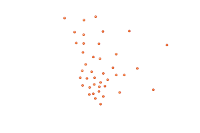

In [142]:
#get feature layer containing updated data for maps associated with the CUMULATIVE COVID-19 dashboard
layer2 = gis.content.get(mort_cum_layer_id)
layer2

In [143]:
#List all the current fields in the layer so you can use one as a field template.
cum_mort_lyr = layer2.layers[0]
cum_mort_lyr

<FeatureLayer url:"https://services1.arcgis.com/SIYkiqjmENweC50g/arcgis/rest/services/COVID19_Weekly_Mortalities/FeatureServer/0">

In [144]:
#reformat date for use in appending: append_source = column name in csv, append_field = column name in feature layer, append_alias = column alias
append_alias = '{} - {}'.format(old_date.replace('2020','20'), new_date.replace('2020','20'))
append_field = 'F{}___{}'.format(old_date.replace('2020','20').replace('/','_'), new_date.replace('2020','20').replace('/','_'))
append_source = '{}___{}'.format(old_date.replace('2020','20').replace('/','_'), new_date.replace('2020','20').replace('/','_'))

print(append_alias)
print(append_field)
print(append_source)

11/28/20 - 12/12/20
F11_28_20___12_12_20
11_28_20___12_12_20


In [145]:
#Create a dictionary from a deep copy of a field in the feature layer, and update the values of this dictionary to reflect a new field.
new_field = dict(deepcopy(cum_mort_lyr.properties.fields[5]))
new_field['name'] = append_field
new_field['alias'] = append_alias
new_field['length'] = "10"
print(new_field)

#Update feature layer definition with the new field using the add_to_definition() method.
field_list = [new_field]
cum_mort_lyr.manager.add_to_definition({"fields":field_list})

{'name': 'F11_28_20___12_12_20', 'type': 'esriFieldTypeDouble', 'actualType': 'float', 'alias': '11/28/20 - 12/12/20', 'sqlType': 'sqlTypeFloat', 'nullable': True, 'editable': True, 'domain': None, 'defaultValue': None, 'length': '10'}


{'success': True}

In [146]:
#get *append_csv_info* when appending a new column for source_info
append_csv_info = gis.content.analyze(item=mort_append_csv_id, file_type='csv', location_type='none')
#append_csv_info

In [147]:
#append new date column to feature layer from csv item
cum_mort_lyr.append(item_id= mort_append_csv_id,
                      upload_format = 'csv',
                      field_mappings = [{"name":"{}".format(append_field), "source":"{}".format(append_source)},
                                        {"name":"sra_num", "source":"sra_num"}],
                      source_info = append_csv_info['publishParameters'],
                      update_geometry=False,
                      append_fields=["{}".format(append_field), "sra_num"],
                      skip_inserts=True,
                      upsert_matching_field="sra_num")

True

### Modify Mortality Map Symbology

In [148]:
#get mortitalization max for graduated point symbology
mort_max = mort_new_week['new_mortalities'].max()
print(mort_max)

#get map data
mort_map = get_map(mort_map_id)

#set max value for graduated points symbols
mort_map['operationalLayers'][1]['layerDefinition']['drawingInfo']['renderer']['visualVariables'][0]['maxDataValue'] = mort_max.item()
mort_map['operationalLayers'][1]['layerDefinition']['drawingInfo']['renderer']['authoringInfo']['visualVariables'][0]['maxSliderValue'] = mort_max.item()
mort_map['operationalLayers'][2]['layerDefinition']['drawingInfo']['renderer']['visualVariables'][0]['maxDataValue'] = mort_max.item()
mort_map['operationalLayers'][2]['layerDefinition']['drawingInfo']['renderer']['authoringInfo']['visualVariables'][0]['maxSliderValue'] = mort_max.item()

#update map to save changes
mort_map_update = update_map(mort_map_id, mort_map)
mort_map_update

16.700000000000003
<Item title:"New Weekly COVID-19 Mortalities by SD SRA" type:Web Map owner:jembury8568_SDSUGeo>


True

# DASHBOARDS

In [149]:
webbrowser.open(dash, new=2)
webbrowser.open(dash_edit, new=2)
webbrowser.open(dash_mobile_edit, new=2)

True